# What does it take to win in League of Legends?
__A LoL Logistics Regression Analysis
<br>Jessica Ngo__

I have probably spent more time in my college years playing League of Legends, Riot's online multiplayer battle arena game, than I will have coding this up. 

Jokes aside, this is a passion project for me, combining my two loves of data and League! Due to the binary nature of the outcome of the game (only one team can win), we can use logistic regression to build a model that will predict the outcome of the game.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)

# Data

In [2]:
#import dataframe
df=pd.read_csv("data/lol_games.csv")

In [3]:
#view number of records
len(df)

51490

In [4]:
#view columns
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

The data was downloaded from [Kaggle](https://www.kaggle.com/datasnaek/league-of-legends). There are 51490 records and each records represents a game and its features. These features include:
<br>
>Game ID
<br>Creation Time (in Epoch format)
<br>Game Duration (in seconds)
<br>Season ID
<br>Winner (1 = team1, 2 = team2)
<br>First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
<br>Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
<br>The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
<br>The 5 bans of each team (Again, champion IDs are used)

In [5]:
#view first five columns
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1.500000e+12,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1.500000e+12,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1.500000e+12,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1.500000e+12,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1.500000e+12,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [6]:
#check for any empty values
df.isnull().any()

gameId                False
creationTime          False
gameDuration          False
seasonId              False
winner                False
firstBlood            False
firstTower            False
firstInhibitor        False
firstBaron            False
firstDragon           False
firstRiftHerald       False
t1_champ1id           False
t1_champ1_sum1        False
t1_champ1_sum2        False
t1_champ2id           False
t1_champ2_sum1        False
t1_champ2_sum2        False
t1_champ3id           False
t1_champ3_sum1        False
t1_champ3_sum2        False
t1_champ4id           False
t1_champ4_sum1        False
t1_champ4_sum2        False
t1_champ5id           False
t1_champ5_sum1        False
t1_champ5_sum2        False
t1_towerKills         False
t1_inhibitorKills     False
t1_baronKills         False
t1_dragonKills        False
                      ...  
t1_ban1               False
t1_ban2               False
t1_ban3               False
t1_ban4               False
t1_ban5             

## Exploratory Data Analysis

A general indicator of how well a team is performing in game is how many objectives that team has taken. For our model, we will focus on these features: 
<br>
>The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has

Because of this, we will drop all other features.

In [7]:
#drop features
df.drop(['gameId', 'creationTime', 'gameDuration', 'seasonId',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5'],axis=1,inplace=True)

In [8]:
#view first five columns of updated dataset
df.head()

,winner,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1,11,1,2,3,0,5,0,0,1,1
1,1,10,4,0,2,1,2,0,0,0,0
2,1,8,1,1,1,0,2,0,0,1,0
3,1,9,2,1,2,0,0,0,0,0,0
4,1,9,2,1,3,0,3,0,0,1,0


Here, we are using a pairplot to visualise the relationship between our features and outcome, colored by which team won.

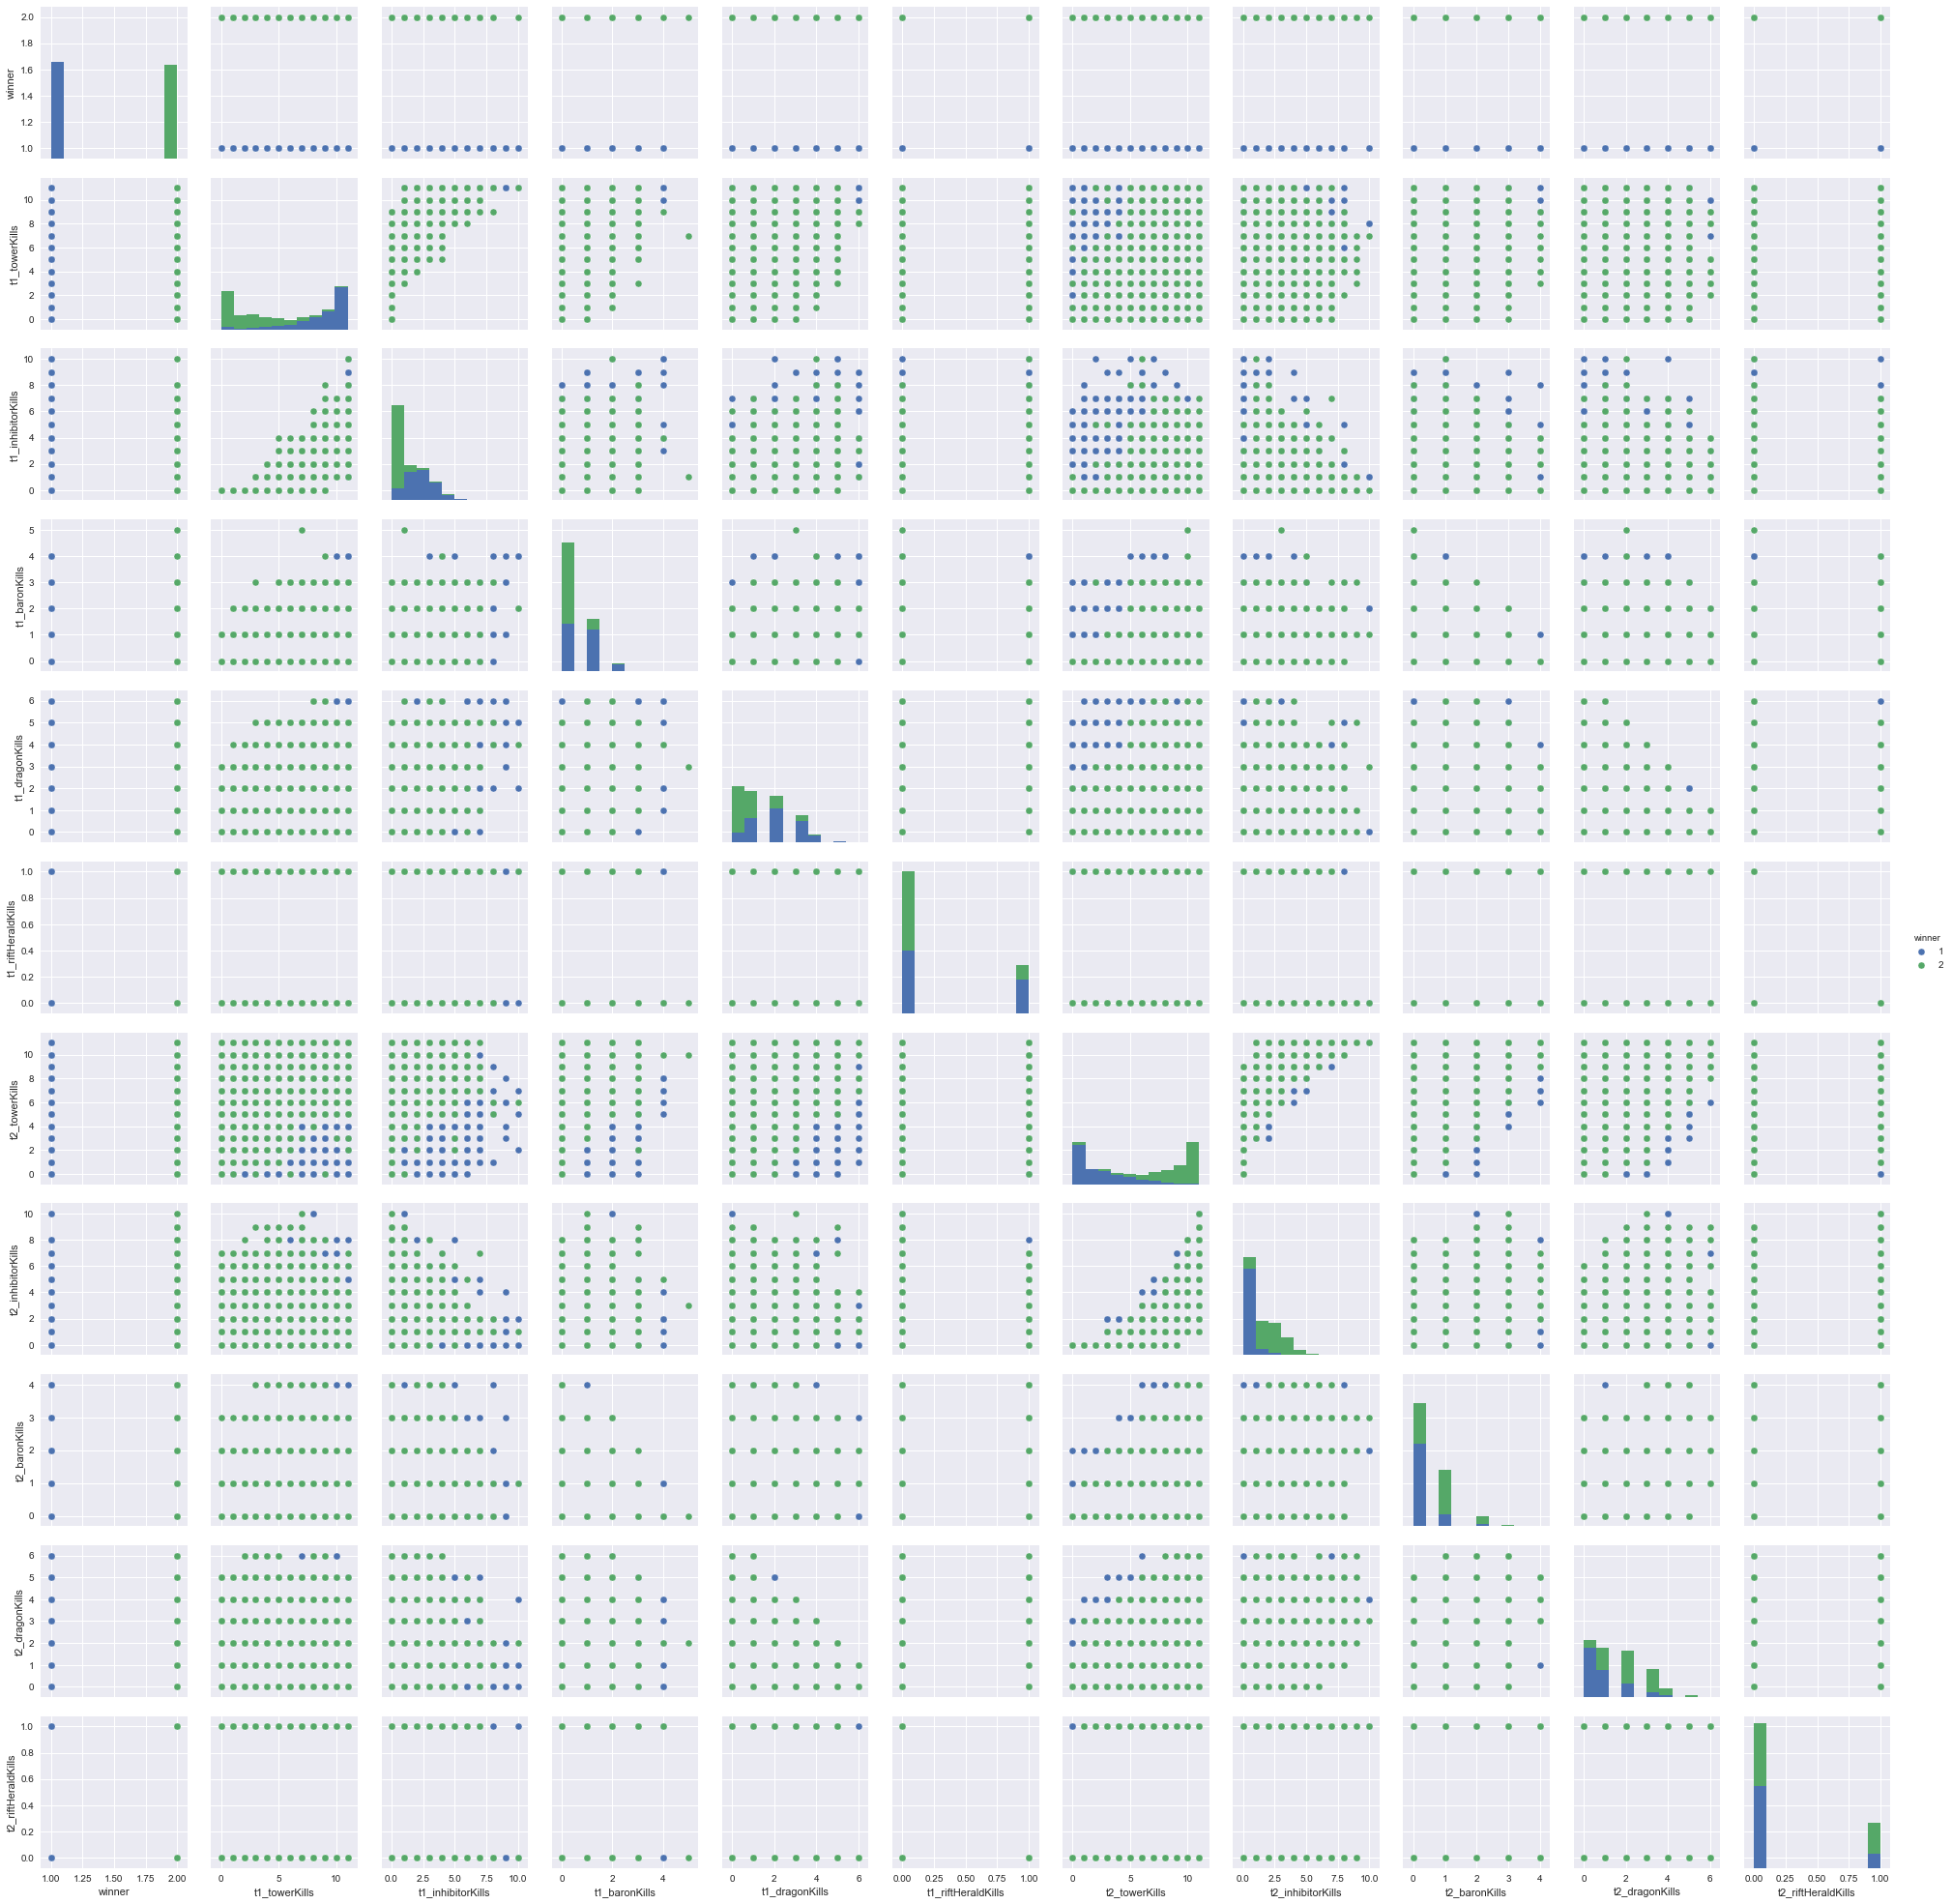

In [9]:
#pairplot of variables
sns.pairplot(df,hue='winner')

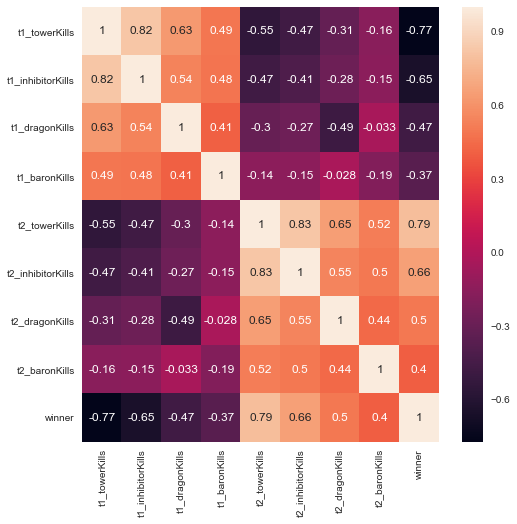

In [10]:
#correlation matrix
sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(df[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills',
                  't2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','winner']].corr(),annot=True)

From our correlation matrix, we find moderate/strong correlations for the following features with our outcome: 
<br>
>
number of inhibitor kills (.65) 
number of tower kills (.78)

We find weaker correlations with the following features:
<br>
>
number of dragon kills (.5) 
number of baron kills (.4)

There are negative correlations showing up on this heatmap as team 1 winning is denoted with "1" in the data while team 2 winning is denoted with "2." Because of this, only one team will have positive correlations while the other has negative ones. For our model, we will use features with moderate/strong correlations.

## Model Building

We split the data into training set and testing set using train_test_split, and then create the model and train it by fitting it to 70% of our data.

In [11]:
X = df[['t1_towerKills','t1_inhibitorKills','t2_towerKills','t2_inhibitorKills']]
y = df['winner']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
#fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluation

In [13]:
predictions = lr.predict(X_test)

Classification report for the model:

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.95      0.97      0.96      7733
          2       0.97      0.95      0.96      7714

avg / total       0.96      0.96      0.96     15447



In [22]:
fit = lr.fit(X, y)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Outcome')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-1.17867193  0.24945516  1.21043641 -0.32040921]]
[-0.05165925]

 Accuracy by Outcome
winner      1      2
row_0               
1       25200   1337
2         877  24076

 Percentage accuracy
0.957001359487279
